# home-credit-default-risk

# Exploracion de datos

In [1]:
import pandas as pd 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
import os
import seaborn as sb
import numpy as np
from scipy import stats



print(os.listdir("/Users/geraldine/Desktop/all/"))


['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [2]:
data_test=pd.read_csv("/Users/geraldine/Desktop/all/application_test.csv")
data_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [4]:
data_train=pd.read_csv("/Users/geraldine/Desktop/all/application_train.csv")
data_train.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
data_train.shape

(307511, 122)

Podemos observar que hay 122 caracteristicas y 307511 observaciones

In [7]:
#conteo de cantidad de tipo de datos del data set
data_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Podemos notar que existen 16 valores categoricos y 106 valores numericos.


In [8]:
data_train.keys()

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [9]:
#Observando si existen valores nulos o perdidos
data_train.isnull().any().any()

True

Como podemos ver dio TRUE, es decir, existen valores nulos o faltantes en el dataset, para poder continuar se va a inferir

#  VALORES PERDIDOS

In [10]:
#Entradas categoricas 
data_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [11]:
missing_val=data_train.isnull().sum()
missing_val.head(100)



SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

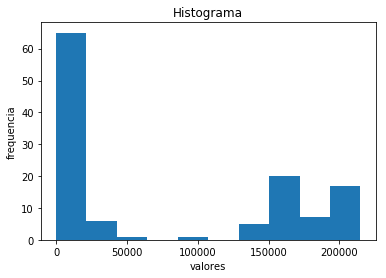

In [12]:
#histograma valores perdidos
missing_val.plot('hist',bins=10)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()


In [13]:
mis_val_percent = 100 * data_train.isnull().sum() / len(data_train)
mis_val_percent.head(100)



SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [14]:
# Total valores faltantes
total = np.product(data_train.shape)
total_missing = missing_val.sum()

# porcentaje de valores faltantes
(total_missing/total) * 100

24.39594190712943

In [15]:
# Agrupando columnas por tipos
data_type = data_train.columns.to_series().groupby(data_train.dtypes).groups

# Creando columnas categoricas
colums_cat = data_type[np.dtype('object')]
len(colums_cat)

16

Se tienen 16 columnas categoricas de 122 columnas.


In [16]:
# Creando columnas numericas
#lista de columnas
columnas = data_train.columns  
colums_num = list(set(columnas) - set(colums_cat))
len(colums_num)

106

Se tienen 106 columnas categoricas de 122 columnas.

# Conociendo prestamos reembolsados(0) y no reembolsados(1)

In [17]:
len(data_train['TARGET'])


307511

In [18]:
# Subset de prestamo no reembolsado
data_target_no_reemb= data_train[data_train['TARGET']==1]
data_target_no_reemb.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
110,100130,1,Cash loans,F,N,Y,1,157500.0,723996.0,30802.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
138,100160,1,Cash loans,M,N,Y,0,292500.0,675000.0,36747.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
154,100181,1,Cash loans,F,N,Y,0,157500.0,245619.0,12667.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
163,100192,1,Cash loans,F,N,N,0,111915.0,225000.0,21037.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Subset de prestamo reembolsado
data_target_reemb=data_train[data_train['TARGET']==0]
data_target_reemb.head(10)



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


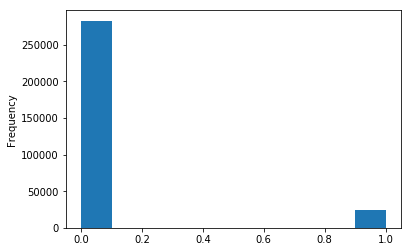

In [20]:
data_train['TARGET'].plot('hist')
plt.show()

Del grafico anterior podemos observar que de los datos de TARGET que se presentan los prestamos que no fueron reembolsados o pagados a tiempo esta entre 0 a 50000 y los prestamos que fueron reembolsados o pagados a tiempo abarca mas de 250000. Podemos obsevar que fueron mas los prestamos que fueron reembolsados a tiempo.

In [21]:
data_train['TARGET'].value_counts()



0    282686
1     24825
Name: TARGET, dtype: int64

El numero de reembolsos a tiempo son 282686, mientras que de reembolsos no a tiempo son de 24825

In [22]:
# Porcentaje de cantidad de reembolsos y de no reembolsos 
100 * data_train['TARGET'].value_counts() / len(data_train['TARGET'])

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

Vemos que en nuestro target hay un 91.93% de reembolsos a tiempo mas que de reembolsos no tiempo con un 8.072%

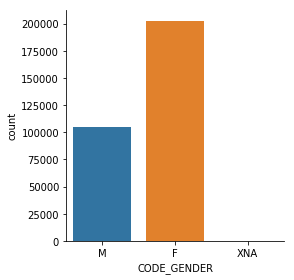

In [23]:
sb.factorplot('CODE_GENDER',data=data_train,kind="count")

Podemos observar del grafico anterior que la cantidad de genero que mas realiza  de prestamos es el genero femenino
abarcando entre 0 a 200000 y de hombre entre 0 a 100000

In [24]:
data_train['CODE_GENDER'].value_counts()



F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

La cantidad exacta de mujeres son 202448 y de hombres son 105059.

In [25]:
data_target_no_reemb['CODE_GENDER'].value_counts()

F    14170
M    10655
Name: CODE_GENDER, dtype: int64

Tenemos que numero de reembolsos que no se ha dado a tiempo, han sido mas del genero femenino con un conteo de 14170 y de hombres de 10655. Siendo una diferencia de 3515 mas de mujeres que de hombres al no realizar reembolsos a tiempo.

In [26]:
data_target_reemb['CODE_GENDER'].value_counts()

F      188278
M       94404
XNA         4
Name: CODE_GENDER, dtype: int64

Tenemos que numero de reembolsos realizados a tiempo, han sido mas del genero femenino con un conteo de 188278 y de hombres de 94404. Siendo una diferencia de 93874 mas de mujeres que de hombres, al realizar reembolsos.

In [27]:
# tabla de contingencia en porcentajes relativos
pd.crosstab(index=data_train['CODE_GENDER'], columns=data_train['TARGET'] ).apply(lambda r: r/r.sum() *100, axis=0)

TARGET,0,1
CODE_GENDER,,
F,66.603228,57.079557
M,33.395357,42.920443
XNA,0.001415,0.000000


Se presenta que un 66.60% del genero femenino que realizaron reembolsos a tiempo y del genero masculino un 33.39%. 
De reembolsos no realizados a tiempo se observa que un 57.08% del genero femenino no realizaron reembolsos, mas que del genero masculino siendo un 42.92%

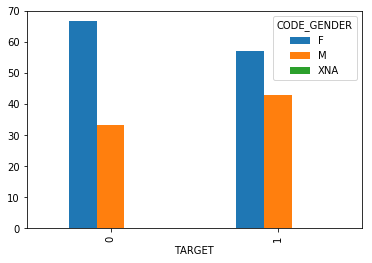

In [28]:
plot = pd.crosstab(index=data_train['TARGET'],
            columns=data_train['CODE_GENDER']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

Visualmente se puede observar los datos de la tabla de contingencia, que las mujeres son las que mas han hecho reembolsos a tiempo y a su vez las que no han hecho reembolsos a tiempo. Tambien se puede observar que en reembolsos no ha tiempo abarca mas hombres que en los reembolsos a tiempo. 

#  Llenando- Valores Perdidos 

In [29]:
# inferir y reemplazar 
for i in colums_num:
    media = data_train[i].mean()
    data_train[i] = data_train[i].fillna(media)

In [30]:
for j in colums_cat:
    comun = data_train[j].mode()[0]
    data_train[j] = data_train[j].fillna(comun)

In [31]:
data_train.isnull().any().any()

False

Como podemos ver ya los datos nos arroja false de que no hay ahora valores perdidos 

# Correlacion de los datos con el Target

In [32]:
correlation = data_train.corr()['TARGET'].sort_values()
print(correlation)

EXT_SOURCE_2                  -0.160303
EXT_SOURCE_3                  -0.157397
EXT_SOURCE_1                  -0.099152
DAYS_EMPLOYED                 -0.044932
AMT_GOODS_PRICE               -0.039628
REGION_POPULATION_RELATIVE    -0.037227
AMT_CREDIT                    -0.030369
FLOORSMAX_AVG                 -0.029145
FLOORSMAX_MEDI                -0.028989
FLOORSMAX_MODE                -0.028631
FLAG_DOCUMENT_6               -0.028602
HOUR_APPR_PROCESS_START       -0.024166
FLAG_PHONE                    -0.023806
TOTALAREA_MODE                -0.021943
LIVINGAREA_AVG                -0.021804
ELEVATORS_AVG                 -0.021745
LIVINGAREA_MEDI               -0.021634
ELEVATORS_MEDI                -0.021531
ELEVATORS_MODE                -0.020430
LIVINGAREA_MODE               -0.020276
APARTMENTS_AVG                -0.019336
APARTMENTS_MEDI               -0.019131
APARTMENTS_MODE               -0.017885
FLOORSMIN_AVG                 -0.017727
FLOORSMIN_MEDI                -0.017611


De lo anterior el que mas se acerca a 1 seria el Days_Birth siendo esta una correlacion positiva y significativa aunque su correlacion no este aun muy cerca del 1 es la que mas se acerca del resto. Y de las correlacionales negativas estan EXT_SOURCE_1, EXT_SOURCE_2,EXT_SOURCE_3 las que mas tienden acercarse a -1

In [38]:
data_train['EXT_SOURCE_1'].head(10)

0    0.083037
1    0.311267
2    0.502130
3    0.502130
4    0.502130
5    0.502130
6    0.774761
7    0.502130
8    0.587334
9    0.502130
Name: EXT_SOURCE_1, dtype: float64

In [39]:
data_train['EXT_SOURCE_2'].head(10)

0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
5    0.354225
6    0.724000
7    0.714279
8    0.205747
9    0.746644
Name: EXT_SOURCE_2, dtype: float64

In [40]:
data_train['EXT_SOURCE_3'].head(10)

0    0.139376
1    0.510853
2    0.729567
3    0.510853
4    0.510853
5    0.621226
6    0.492060
7    0.540654
8    0.751724
9    0.510853
Name: EXT_SOURCE_3, dtype: float64

En la informacion dada respecto a estas 3 columnas dice que son puntuaciones normalizadas de una fuente externa. Esto puede ser alguna puntuacion que tenga el cliente. 

In [41]:
data_train['DAYS_BIRTH'].head(10)

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
5   -16941
6   -13778
7   -18850
8   -20099
9   -14469
Name: DAYS_BIRTH, dtype: int64

Segun la informacion dada para esta columna dice que es la edad del cliente en el momento de aplicar. Podemos notar que tienen valores negativos. 

In [44]:
#convirtiendo edad de cliente en años
age_client = (data_train["DAYS_BIRTH"]/365.2425)
age_client = age_conv.abs().apply(np.floor)
age_client.head(10)




0    25.0
1    45.0
2    52.0
3    52.0
4    54.0
5    46.0
6    37.0
7    51.0
8    55.0
9    39.0
Name: DAYS_BIRTH, dtype: float64

In [46]:
age_client.describe()

count    307511.000000
mean         43.405442
std          11.945936
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

Text(0.5,1,'Histograma Edad')

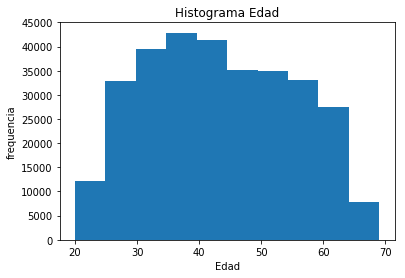

In [47]:
age_client.plot('hist')
plt.ylabel('frequencia')
plt.xlabel('Edad')
plt.title('Histograma Edad')

Del grafico anterior podemos ver que en el momento de aplicar la mayoria de los clientes tienen entre 30 a 40 años. 